In [ ]:
# Basic imports
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# For clustering
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

# For classification
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

# For cluster quality
from sklearn.metrics import adjusted_rand_score

# Reproducibility
RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)


Upload File

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving covtype.csv to covtype.csv


In [ ]:
import pandas as pd
import io

df = pd.read_csv(io.BytesIO(uploaded['covtype.csv']))
df.head()


,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5


In [ ]:
print("Dataset shape:", df.shape)


Dataset shape: (581012, 55)


In [ ]:
df.shape


(581012, 55)

In [ ]:
df.columns


Index(['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area1',
       'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4',
       'Soil_Type1', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5',
       'Soil_Type6', 'Soil_Type7', 'Soil_Type8', 'Soil_Type9', 'Soil_Type10',
       'Soil_Type11', 'Soil_Type12', 'Soil_Type13', 'Soil_Type14',
       'Soil_Type15', 'Soil_Type16', 'Soil_Type17', 'Soil_Type18',
       'Soil_Type19', 'Soil_Type20', 'Soil_Type21', 'Soil_Type22',
       'Soil_Type23', 'Soil_Type24', 'Soil_Type25', 'Soil_Type26',
       'Soil_Type27', 'Soil_Type28', 'Soil_Type29', 'Soil_Type30',
       'Soil_Type31', 'Soil_Type32', 'Soil_Type33', 'Soil_Type34',
       'Soil_Type35', 'Soil_Type36', 'Soil_Type37', 'Soil_Type38',
       'Soil_Type39', 'Soil_Type40

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 55 columns):
 #   Column                              Non-Null Count   Dtype
---  ------                              --------------   -----
 0   Elevation                           581012 non-null  int64
 1   Aspect                              581012 non-null  int64
 2   Slope                               581012 non-null  int64
 3   Horizontal_Distance_To_Hydrology    581012 non-null  int64
 4   Vertical_Distance_To_Hydrology      581012 non-null  int64
 5   Horizontal_Distance_To_Roadways     581012 non-null  int64
 6   Hillshade_9am                       581012 non-null  int64
 7   Hillshade_Noon                      581012 non-null  int64
 8   Hillshade_3pm                       581012 non-null  int64
 9   Horizontal_Distance_To_Fire_Points  581012 non-null  int64
 10  Wilderness_Area1                    581012 non-null  int64
 11  Wilderness_Area2                    581012 non-null 

In [ ]:
df.describe()


,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
count,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,...,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000
mean,2959.365301,155.656807,14.103704,269.428217,46.418855,2350.146611,212.146049,223.318716,142.528263,1980.291226,...,0.090392,0.077716,0.002773,0.003255,0.000205,0.000513,0.026803,0.023762,0.015060,2.051471
std,279.984734,111.913721,7.488242,212.549356,58.295232,1559.254870,26.769889,19.768697,38.274529,1324.195210,...,0.286743,0.267725,0.052584,0.056957,0.014310,0.022641,0.161508,0.152307,0.121791,1.396504
min,1859.000000,0.000000,0.000000,0.000000,-173.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2809.000000,58.000000,9.000000,108.000000,7.000000,1106.000000,198.000000,213.000000,119.000000,1024.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,2996.000000,127.000000,13.000000,218.000000,30.000000,1997.000000,218.000000,226.000000,143.000000,1710.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,3163.000000,260.000000,18.000000,384.000000,69.000000,3328.000000,231.000000,237.000000,168.000000,2550.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
max,3858.000000,360.000000,66.000000,1397.000000,601.000000,7117.000000,254.000000,254.000000,254.000000,7173.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000


In [ ]:
target_col = 'Cover_Type'

print("Target column:", target_col)
print("Unique classes:", sorted(df[target_col].unique()))
print("Number of classes:", df[target_col].nunique())
print("\nClass distribution:\n", df[target_col].value_counts())


Target column: Cover_Type
Unique classes: [np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7)]
Number of classes: 7

Class distribution:
 Cover_Type
2    283301
1    211840
3     35754
7     20510
6     17367
5      9493
4      2747
Name: count, dtype: int64


Check for Missing Values

In [ ]:
df.isnull().sum()


,0
Elevation,0
Aspect,0
Slope,0
Horizontal_Distance_To_Hydrology,0
Vertical_Distance_To_Hydrology,0
Horizontal_Distance_To_Roadways,0
Hillshade_9am,0
Hillshade_Noon,0
Hillshade_3pm,0
Horizontal_Distance_To_Fire_Points,0


Check for Duplicate Rows

In [ ]:
df.duplicated().sum()


np.int64(0)

If duplicates exist, remove them

In [ ]:
df = df.drop_duplicates()
df.shape


(581012, 55)

Final confirmation of cleanliness

In [ ]:
df.isnull().sum().sum()


np.int64(0)

Target Class Distribution (Compulsory Plot)

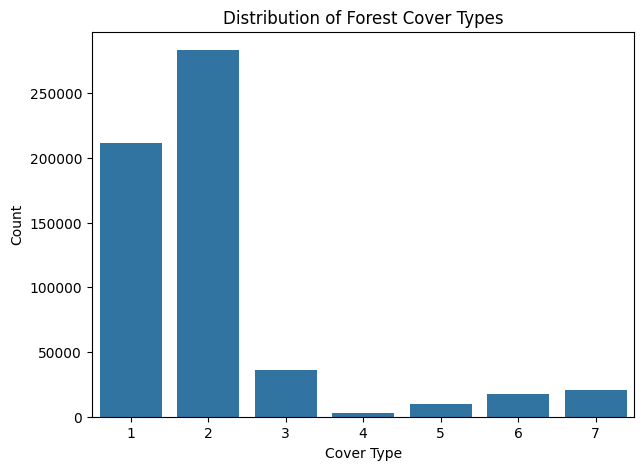

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(7,5))
sns.countplot(x=df['Cover_Type'])
plt.title("Distribution of Forest Cover Types")
plt.xlabel("Cover Type")
plt.ylabel("Count")
plt.show()


Distribution of Important Numerical Features

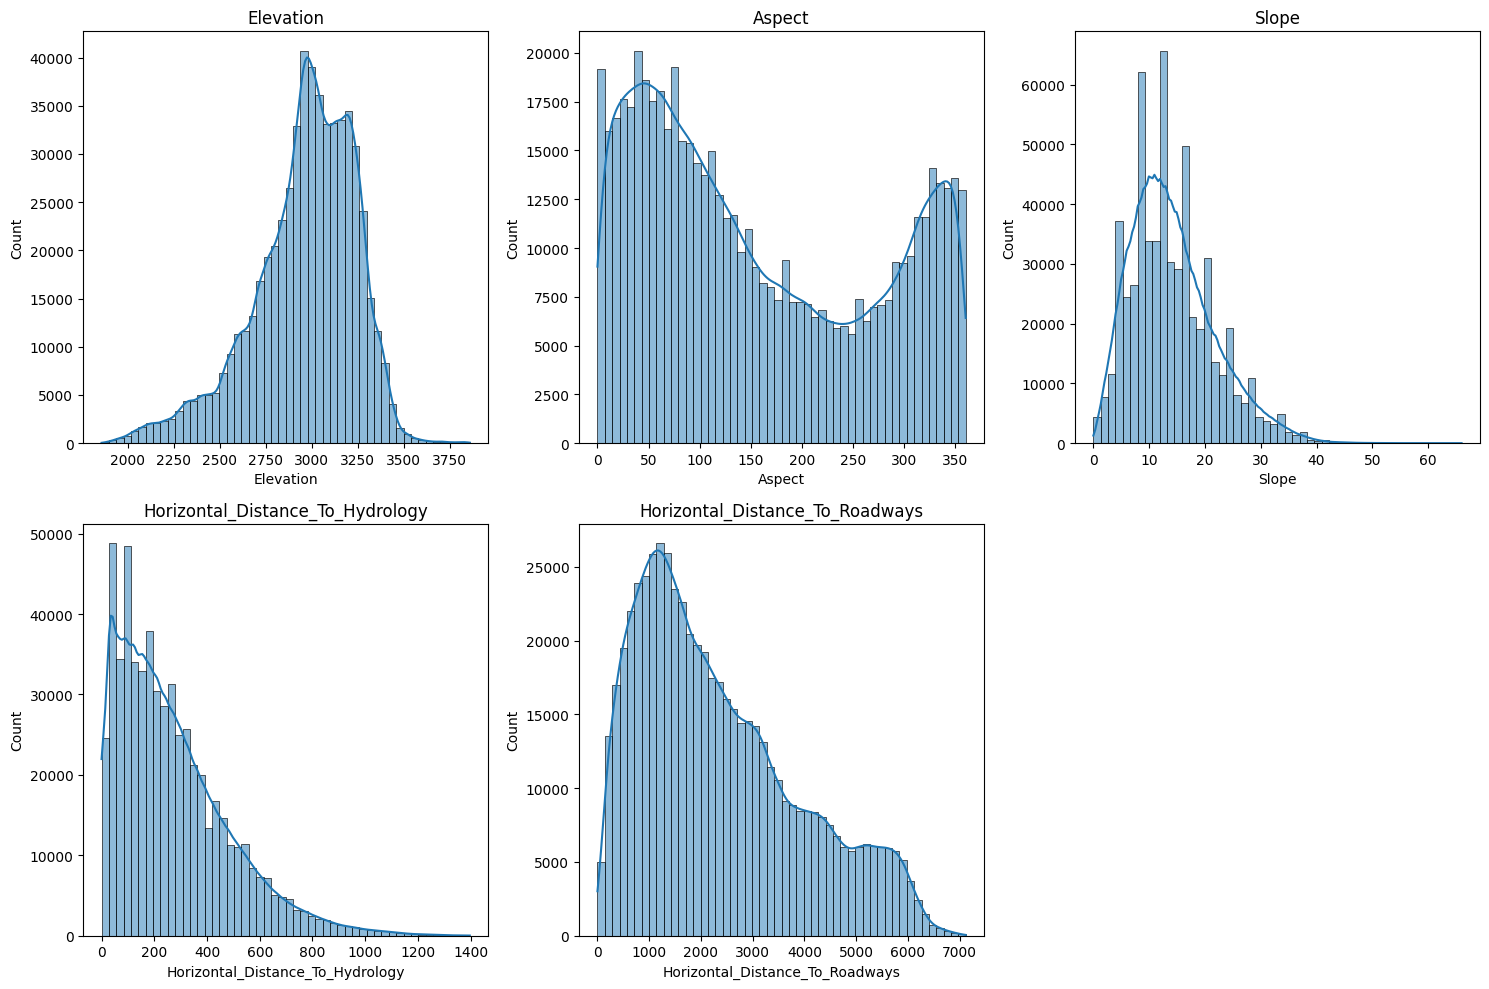

In [ ]:
num_features = [
    'Elevation',
    'Aspect',
    'Slope',
    'Horizontal_Distance_To_Hydrology',
    'Horizontal_Distance_To_Roadways'
]

plt.figure(figsize=(15,10))
for i, col in enumerate(num_features):
    plt.subplot(2,3,i+1)
    sns.histplot(df[col], bins=50, kde=True)
    plt.title(col)

plt.tight_layout()
plt.show()


Boxplots (Check Outliers)

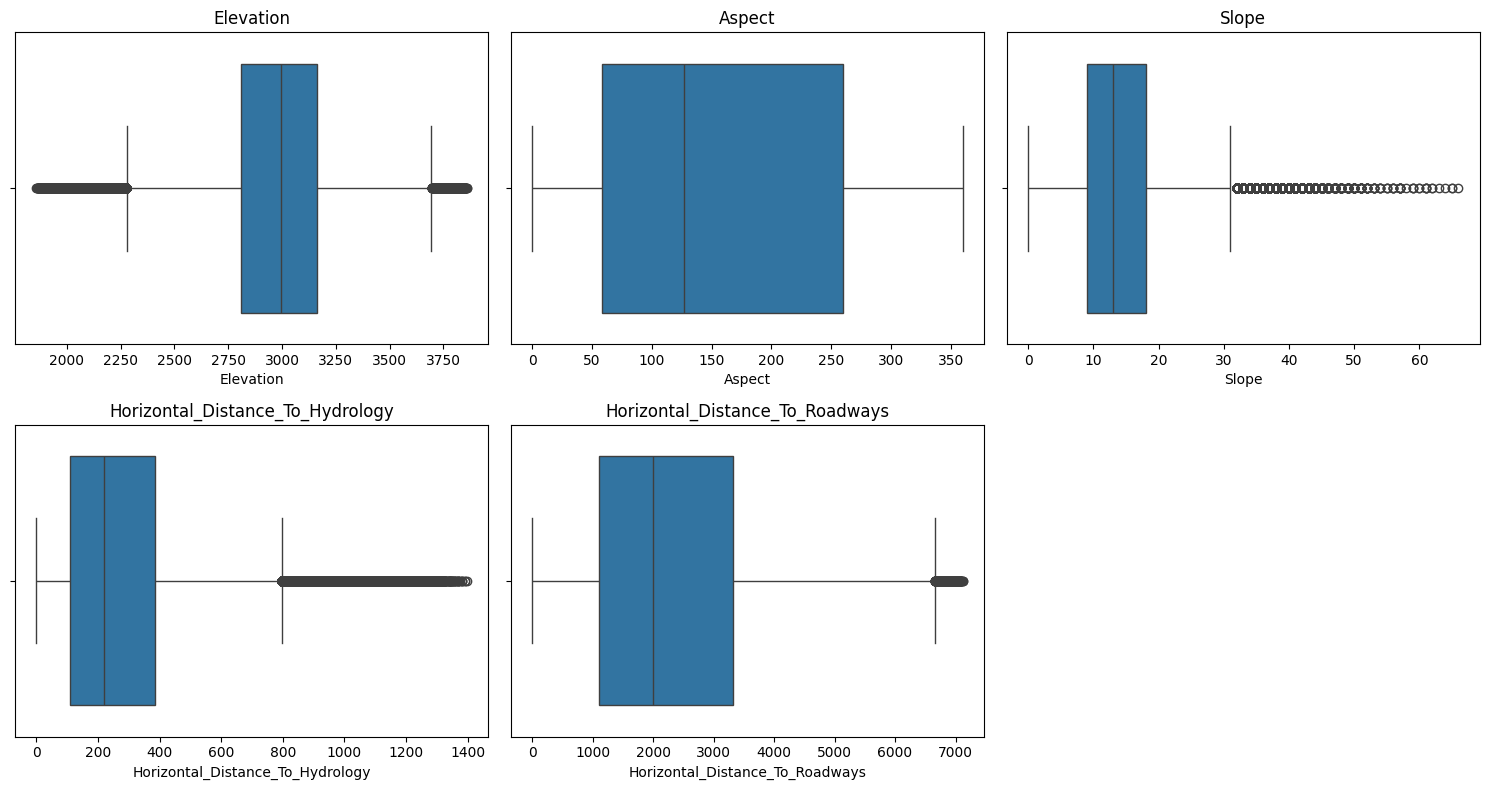

In [ ]:
plt.figure(figsize=(15,8))
for i, col in enumerate(num_features):
    plt.subplot(2,3,i+1)
    sns.boxplot(x=df[col])
    plt.title(col)

plt.tight_layout()
plt.show()


Correlation Heatmap (Numerical Features)

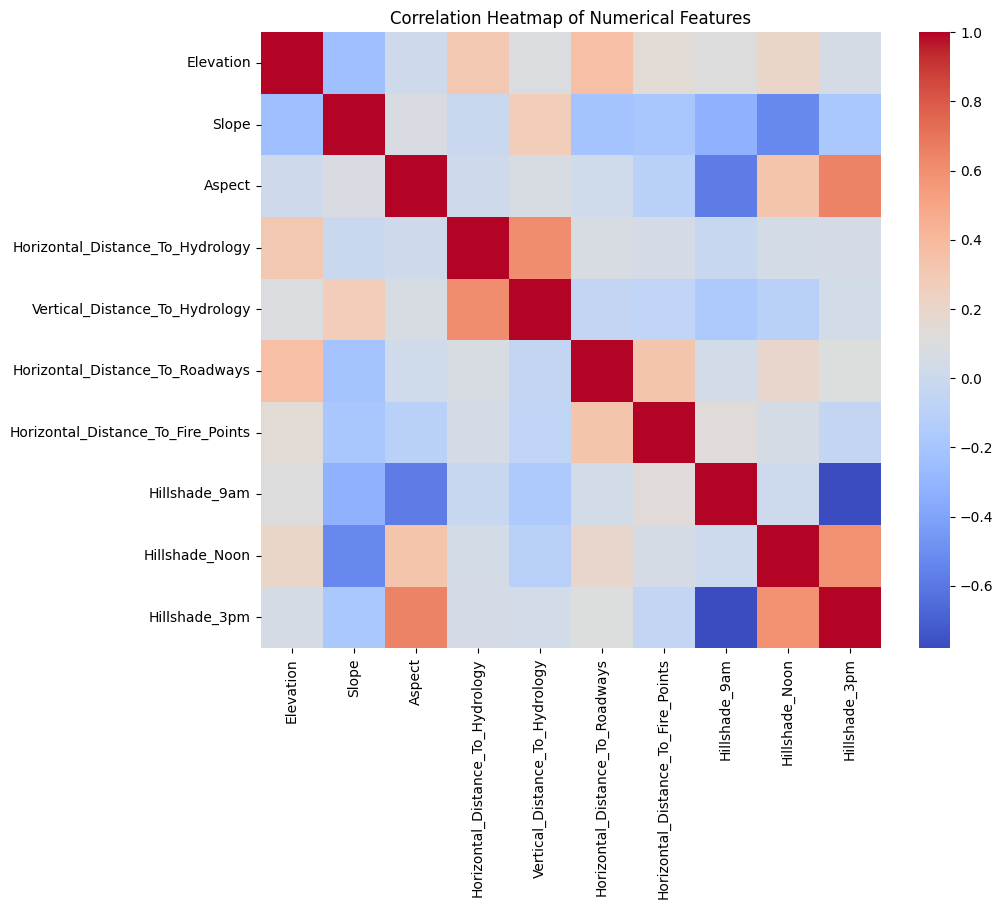

In [ ]:
corr_features = [
    'Elevation',
    'Slope',
    'Aspect',
    'Horizontal_Distance_To_Hydrology',
    'Vertical_Distance_To_Hydrology',
    'Horizontal_Distance_To_Roadways',
    'Horizontal_Distance_To_Fire_Points',
    'Hillshade_9am',
    'Hillshade_Noon',
    'Hillshade_3pm'
]

plt.figure(figsize=(10,8))
sns.heatmap(df[corr_features].corr(), annot=False, cmap='coolwarm')
plt.title("Correlation Heatmap of Numerical Features")
plt.show()


FEATURE SCALING & TRAIN–TEST SPLIT

Separate Features and Target

In [ ]:
X = df.drop(columns=['Cover_Type'])
y = df['Cover_Type']

print("X shape:", X.shape)
print("y shape:", y.shape)


X shape: (581012, 54)
y shape: (581012,)


Train–Test Split

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print("Training set:", X_train.shape)
print("Testing set:", X_test.shape)


Training set: (464809, 54)
Testing set: (116203, 54)


Feature Scaling (Standardization)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Scaled training shape:", X_train_scaled.shape)
print("Scaled testing shape:", X_test_scaled.shape)


Scaled training shape: (464809, 54)
Scaled testing shape: (116203, 54)


Multiclass Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

log_reg = LogisticRegression(
    multi_class='multinomial',
    solver='lbfgs',
    max_iter=1000,
    n_jobs=-1,
    random_state=42
)

log_reg.fit(X_train_scaled, y_train)


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(max_iter=1000, multi_class='multinomial', n_jobs=-1,
                   random_state=42)

Make Predictions on Test Set

In [ ]:
y_pred_lr = log_reg.predict(X_test_scaled)


Evaluate Logistic Regression

In [ ]:
lr_accuracy = accuracy_score(y_test, y_pred_lr)
print("Logistic Regression Accuracy:", lr_accuracy)

print("\nClassification Report:\n")
print(classification_report(y_test, y_pred_lr))


Logistic Regression Accuracy: 0.7233806356118172

Classification Report:

              precision    recall  f1-score   support

           1       0.71      0.70      0.70     42368
           2       0.75      0.80      0.77     56661
           3       0.68      0.80      0.73      7151
           4       0.61      0.44      0.51       549
           5       0.15      0.01      0.01      1899
           6       0.49      0.27      0.35      3473
           7       0.74      0.56      0.63      4102

    accuracy                           0.72    116203
   macro avg       0.59      0.51      0.53    116203
weighted avg       0.71      0.72      0.71    116203



Confusion Matrix Visualization

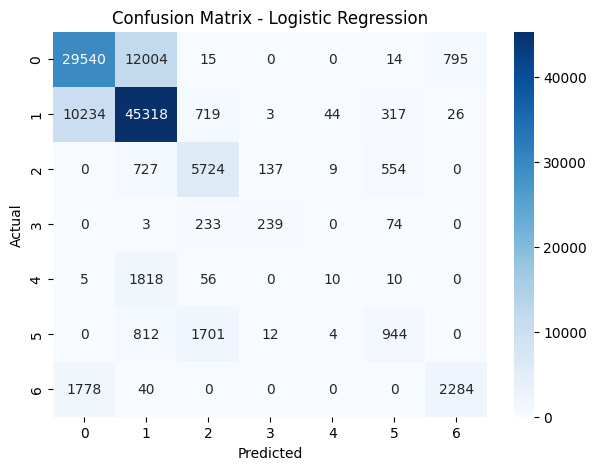

In [ ]:
cm_lr = confusion_matrix(y_test, y_pred_lr)

plt.figure(figsize=(7,5))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


Create a Training Subset (for Speed)

In [ ]:
subset_size = 20000  # safe size for Colab
X_train_sub = X_train_scaled[:subset_size]
y_train_sub = y_train.iloc[:subset_size]

print("Subset training shape:", X_train_sub.shape)


Subset training shape: (20000, 54)


Train SVM (RBF Kernel)

In [ ]:
from sklearn.svm import SVC

svm_model = SVC(
    kernel='rbf',
    C=1.0,
    gamma='scale',
    random_state=42
)

svm_model.fit(X_train_sub, y_train_sub)


SVC(random_state=42)

Predict Using SVM

In [ ]:
y_pred_svm = svm_model.predict(X_test_scaled)


Evaluate SVM

In [ ]:
svm_accuracy = accuracy_score(y_test, y_pred_svm)
print("SVM Accuracy:", svm_accuracy)

print("\nSVM Classification Report:\n")
print(classification_report(y_test, y_pred_svm))


SVM Accuracy: 0.7460478645129643

SVM Classification Report:

              precision    recall  f1-score   support

           1       0.75      0.72      0.73     42368
           2       0.76      0.83      0.79     56661
           3       0.67      0.84      0.74      7151
           4       0.53      0.24      0.33       549
           5       0.91      0.02      0.04      1899
           6       0.52      0.19      0.28      3473
           7       0.76      0.60      0.67      4102

    accuracy                           0.75    116203
   macro avg       0.70      0.49      0.51    116203
weighted avg       0.74      0.75      0.73    116203



Confusion Matrix for SVM

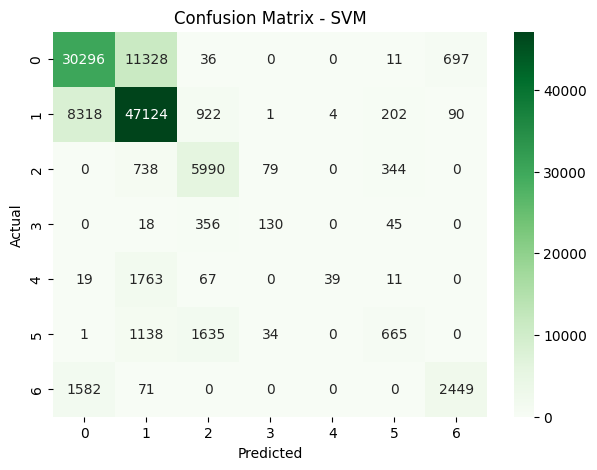

In [ ]:
cm_svm = confusion_matrix(y_test, y_pred_svm)

plt.figure(figsize=(7,5))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix - SVM")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


NEURAL NETWORK (MLP CLASSIFIER)

Train Neural Network (MLPClassifier)

In [ ]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(
    hidden_layer_sizes=(128, 64),
    activation='relu',
    solver='adam',
    max_iter=20,      # we can increase later if needed
    random_state=42,
    verbose=True
)

mlp.fit(X_train_scaled, y_train)


Iteration 1, loss = 0.56518756
Iteration 2, loss = 0.45512683
Iteration 3, loss = 0.41032760
Iteration 4, loss = 0.38098073
Iteration 5, loss = 0.35994143
Iteration 6, loss = 0.34454996
Iteration 7, loss = 0.33237805
Iteration 8, loss = 0.32176436
Iteration 9, loss = 0.31302273
Iteration 10, loss = 0.30480207
Iteration 11, loss = 0.29846483
Iteration 12, loss = 0.29270466
Iteration 13, loss = 0.28698953
Iteration 14, loss = 0.28184509
Iteration 15, loss = 0.27822143
Iteration 16, loss = 0.27403435
Iteration 17, loss = 0.27021057
Iteration 18, loss = 0.26742651
Iteration 19, loss = 0.26374479
Iteration 20, loss = 0.26118157


/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(128, 64), max_iter=20, random_state=42,
              verbose=True)

Predict Using Neural Network

In [ ]:
y_pred_mlp = mlp.predict(X_test_scaled)


Evaluate Neural Network

In [ ]:
mlp_accuracy = accuracy_score(y_test, y_pred_mlp)
print("Neural Network Accuracy:", mlp_accuracy)

print("\nNeural Network Classification Report:\n")
print(classification_report(y_test, y_pred_mlp))


Neural Network Accuracy: 0.8940474858652531

Neural Network Classification Report:

              precision    recall  f1-score   support

           1       0.90      0.88      0.89     42368
           2       0.90      0.92      0.91     56661
           3       0.86      0.89      0.88      7151
           4       0.73      0.88      0.79       549
           5       0.74      0.68      0.71      1899
           6       0.84      0.70      0.76      3473
           7       0.90      0.91      0.90      4102

    accuracy                           0.89    116203
   macro avg       0.84      0.84      0.84    116203
weighted avg       0.89      0.89      0.89    116203



Confusion Matrix (Neural Network)

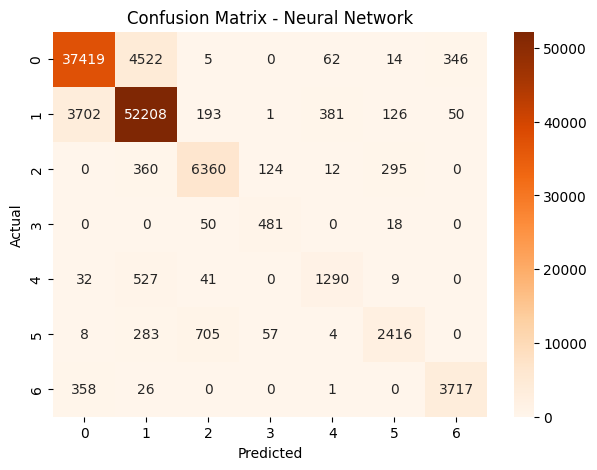

In [ ]:
cm_mlp = confusion_matrix(y_test, y_pred_mlp)

plt.figure(figsize=(7,5))
sns.heatmap(cm_mlp, annot=True, fmt='d', cmap='Oranges')
plt.title("Confusion Matrix - Neural Network")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


K-MEANS CLUSTERING (Unsupervised)

Number of Clusters = Number of Classes

In [ ]:
num_classes = y.nunique()
num_classes


7

Train K-Means on Scaled Training Data

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

kmeans = KMeans(
    n_clusters=num_classes,
    random_state=42,
    n_init=10
)

kmeans.fit(X_train_scaled)


KMeans(n_clusters=7, n_init=10, random_state=42)

Predict Clusters for Test Data

In [ ]:
y_pred_kmeans = kmeans.predict(X_test_scaled)


Evaluate Using Adjusted Rand Index (ARI)

In [ ]:
ari_kmeans = adjusted_rand_score(y_test, y_pred_kmeans)
print("Adjusted Rand Index (K-Means):", ari_kmeans)


Adjusted Rand Index (K-Means): 0.0940814097806543


GAUSSIAN MIXTURE MODEL (GMM)

Train GMM

In [ ]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(
    n_components=num_classes,
    covariance_type='full',
    random_state=42
)

gmm.fit(X_train_scaled)


GaussianMixture(n_components=7, random_state=42)

Predict Clusters

In [ ]:
y_pred_gmm = gmm.predict(X_test_scaled)


Evaluate Using ARI

In [ ]:
ari_gmm = adjusted_rand_score(y_test, y_pred_gmm)
print("Adjusted Rand Index (GMM):", ari_gmm)


Adjusted Rand Index (GMM): 0.08363451192790362


FINAL MODEL COMPARISON

| Model                        | Type         | Evaluation Metric         | Score        |
| ---------------------------- | ------------ | ------------------------- | ------------ |
| Logistic Regression          | Supervised   | Accuracy                  | **0.7234**   |
| SVM (RBF)                    | Supervised   | Accuracy                  | **0.7460**   |
| Neural Network (MLP)         | Supervised   | Accuracy                  | ✅ **0.8940** |
| K-Means                      | Unsupervised | Adjusted Rand Index (ARI) | **0.0941**   |
| Gaussian Mixture Model (GMM) | Unsupervised | Adjusted Rand Index (ARI) | **0.0836**   |
